In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score 
import pickle
import joblib

df=pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')
df.tail()

,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr
1107,1108,51583,1108,51583,SBL,SBL_0051583,1,3.899774,1.697271,3.465151,3.31883,0.096813,5.434540
1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2.757735,1.073076,7.633618,3.30937,0.104817,4.516250
1109,1110,51585,1110,51585,SBL,SBL_0051585,1,3.413469,1.358238,4.335700,3.32455,0.109490,4.933960
1110,1111,51606,1111,51606,MAX_MUN,MaxMun_a_0051606,1,7.839007,1.754363,12.270055,3.23217,0.083964,16.403174
1111,1112,51607,1112,51607,MAX_MUN,MaxMun_a_0051607,1,12.169297,2.818352,9.272107,3.51019,0.044310,23.565982


In [2]:
df.describe()
print('Shape of initial dataset:')
print(df.shape)

#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Shape of initial dataset:
(1112, 13)
Number of null values:
Unnamed: 0     0
SUB_ID         0
X              0
subject        0
SITE_ID        0
FILE_ID        0
DX_GROUP       0
anat_cnr      13
anat_efc      13
anat_fber     13
anat_fwhm     13
anat_qi1      13
anat_snr      13
dtype: int64


In [3]:
#Dropping empty columns
df['anat_cnr'].replace('', np.nan, inplace=True)
df['anat_efc'].replace('', np.nan, inplace=True)
df['anat_fber'].replace('', np.nan, inplace=True)
df['anat_fwhm'].replace('', np.nan, inplace=True)
df['anat_qi1'].replace('', np.nan, inplace=True)
df['anat_snr'].replace('', np.nan, inplace=True)

#Replacing null values in all relevant input columns
df.dropna(subset=['anat_cnr','anat_efc', 'anat_fber', 'anat_fwhm', 'anat_qi1', 'anat_snr'], inplace=True)

#Verifying number of null rows
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Unnamed: 0    0
SUB_ID        0
X             0
subject       0
SITE_ID       0
FILE_ID       0
DX_GROUP      0
anat_cnr      0
anat_efc      0
anat_fber     0
anat_fwhm     0
anat_qi1      0
anat_snr      0
dtype: int64


In [4]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Unnamed: 0 : [   1    2    3 ... 1110 1111 1112]
SUB_ID : [50002 50003 50004 ... 51585 51606 51607]
X : [   1    2    3 ... 1110 1111 1112]
subject : [50002 50003 50004 ... 51585 51606 51607]
SITE_ID : ['PITT' 'OLIN' 'OHSU' 'SDSU' 'TRINITY' 'UM_1' 'UM_2' 'USM' 'YALE' 'CMU'
 'LEUVEN_1' 'LEUVEN_2' 'KKI' 'NYU' 'STANFORD' 'UCLA_1' 'UCLA_2' 'MAX_MUN'
 'CALTECH' 'SBL']
FILE_ID : ['no_filename' 'Pitt_0050003' 'Pitt_0050004' ... 'SBL_0051585'
 'MaxMun_a_0051606' 'MaxMun_a_0051607']
DX_GROUP : [1 2]
anat_cnr : [10.20153877  7.16570147  7.69814438 ...  3.41346894  7.83900677
 12.16929687]
anat_efc : [1.19466382 1.12675161 1.22621772 ... 1.35823764 1.75436261 2.81835195]
anat_fber : [16.22345825 10.4600076   9.72575046 ...  4.33569983 12.27005481
  9.27210712]
anat_fwhm : [3.8780004  4.28223801 3.88168429 ... 3.32455    3.23217    3.51019   ]
anat_qi1 : [0.15271098 0.16171559 0.17418572 ... 0.10948991 0.08396437 0.04430978]
anat_snr : [12.07245188  9.24115456  9.32346277 ...  4.93395956 16.403173

In [5]:
np.isnan(df.values.any()) 

False

In [6]:
X_features = np.load("features.npz")['a']

In [7]:
y_target = np.load("labels.npz")['a']

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_target, test_size=0.20, random_state = 42, shuffle = True, # shuffle dataset
stratify = y_target)

In [9]:
model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(Xtrain,ytrain)

y_pred=model.predict(Xtest)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [10]:
print("Train Accuracy:",model.score(Xtrain, ytrain))
print("Test Accuracy:", model.score(Xtest, ytest))

Train Accuracy: 1.0
Test Accuracy: 0.6171428571428571


In [11]:
from sklearn import metrics

#Classification accuracy
print(metrics.classification_report(ytest, model.predict(Xtest)))

print(accuracy_score(ytest, model.predict(Xtest)))

              precision    recall  f1-score   support

           1       0.61      0.49      0.54        81
           2       0.62      0.72      0.67        94

    accuracy                           0.62       175
   macro avg       0.61      0.61      0.61       175
weighted avg       0.62      0.62      0.61       175

0.6171428571428571


In [12]:
from sklearn.model_selection import KFold, cross_val_score 

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, Xtest, ytest, cv = k_folds) 
print("Average CV Score: ", scores.mean())

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Average CV Score:  0.5428571428571428


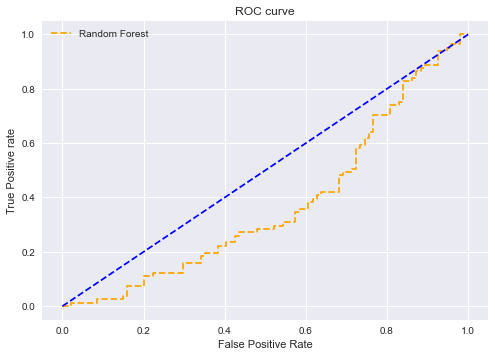

In [13]:
# predict probabilities

pred_prob = model.predict_proba(Xtest)
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(ytest, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();